In [1]:
import pandas as pd
import glob

In [2]:
import os.path

if (not os.path.exists("full-data.bin")):
    l = [pd.read_pickle(filename) for filename in glob.glob("data/chunk-*.bin")]
    df = pd.concat(l, axis=0)
    df.to_pickle('full-data.bin')
    
df = pd.read_pickle('full-data.bin')

In [53]:
import re

def normalizeCycle(raw):
    str1 = ''.join(str(e) for e in raw)    
    return re.sub(r'^(.+?)\1+$', r'\1', str1)        

for node in df.filter(regex="^cycle_.+(?<!norm)(?<!len)(?<!start)$").columns.values:
    print(node)
    df["%s_norm" %node] = df[node].apply(normalizeCycle, 1)


cycle_Actin_BR
cycle_Actin_ST
cycle_Arp2_3
cycle_CP
cycle_Cdc42
cycle_Cofilin
cycle_Coronin
cycle_Cortactin
cycle_Dia1
cycle_Dia2
cycle_Ena_Vasp
cycle_IRSp53
cycle_LIMK
cycle_PAK
cycle_PIP2
cycle_PKD
cycle_Profilin
cycle_ROCK
cycle_Rac1
cycle_RhoA
cycle_SSH
cycle_Thymosin
cycle_WASP
cycle_WAVE


cycle_Actin_BR_norm  cycle_Actin_ST_norm
1                    1                      50050
011                  011                     8185
101                  101                     4458
100                  001                     3984
001                  001                     3922
110                  101                     3568
011                  0                       3043
                     1                       2977
101                  1                       2949
011                  110                     2583
                     010                     2260
001011               10                      1507
1                    0                       1349
010110               010                     1253
001011               001                     1124
110                  110                      921
100101               100                      908
                     01                       787
101100               100                      760
101      

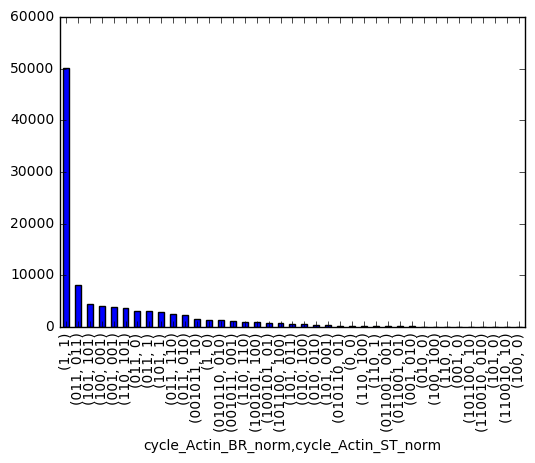

In [24]:
sr = df.groupby(by=["cycle_Actin_BR_norm","cycle_Actin_ST_norm"]).size().sort_values(ascending=False)
sr.plot(kind="bar");
sr

In [55]:
df.groupby(by=["cycle_RhoA_norm","cycle_Rac1_norm"]).size() #.sort_values(ascending=False)

cycle_RhoA_norm  cycle_Rac1_norm
0                0                     61
                 001                   41
                 010                   58
                 011                16699
                 1                  51399
                 100                    2
                 101                 5839
                 110                 4641
001              001                 9241
010              010                 2758
1                0                    176
100              100                 9085
dtype: int64